In [1]:
# Imports
%matplotlib inline
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get price data from Quandl
data = quandl.get("BCHAIN/MKPRU")

In [3]:
# Lets ignore 2010
data = data.loc['2011-01-01':]

In [4]:
# Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2657 entries, 2011-01-01 to 2018-04-10
Data columns (total 1 columns):
Value    2657 non-null float64
dtypes: float64(1)
memory usage: 41.5 KB


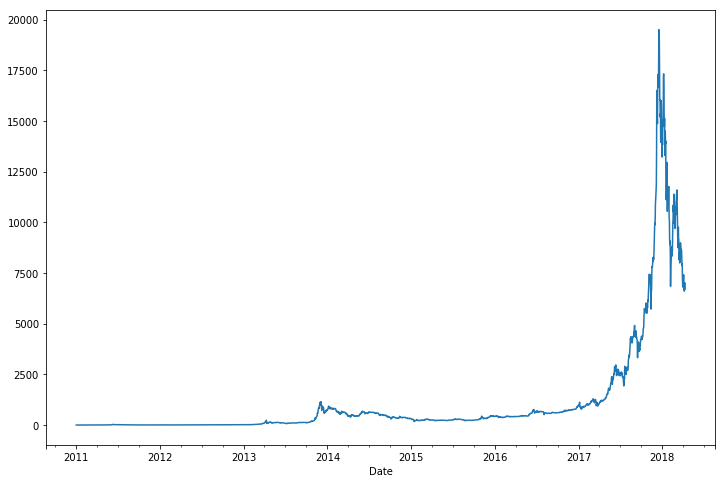

In [5]:
# Visual check of price data
data['Value'].plot(figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1142b47d0>,
      dtype=object)

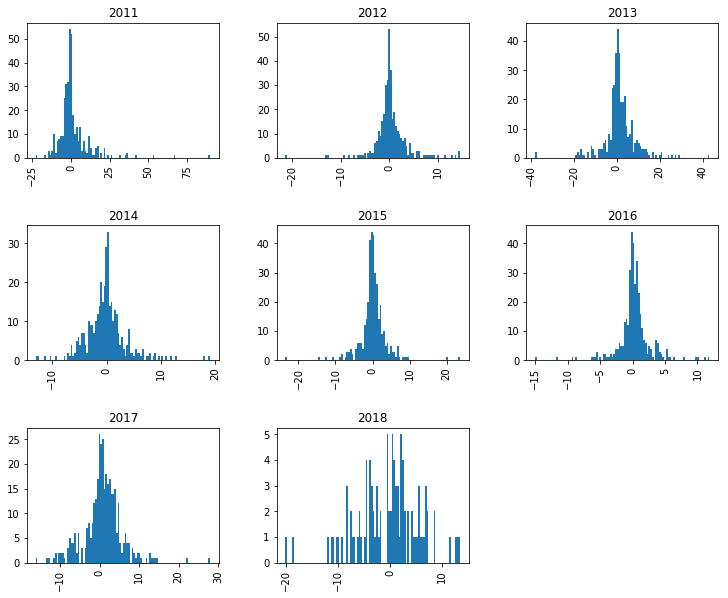

In [6]:
# Freq plot by year showing distribution of returns
(data.pct_change() * 100).hist(bins=100, figsize = (12,10), by = lambda x: x.year)

In [7]:
# Calculate returns from prices
data['Returns'] = data['Value'].pct_change()
data.dropna(inplace = True)

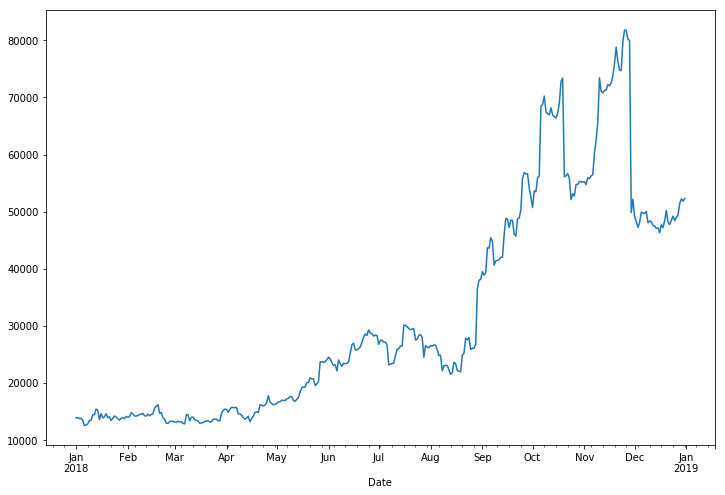

In [35]:
# simulate a random 2018 using distribution of past daily returns
dates = pd.date_range('1 Jan 2018','31 Dec 2018 ')
start_price = data.loc['2017-12-31','Value']
random_2018 = np.random.choice(data['Returns'],len(dates),replace = True)
random_2018_df = pd.DataFrame(random_2018, index = dates, columns = ['Returns'])
random_2018_df.index.name = 'Date'
random_2018_df['Value'] = start_price * (random_2018_df['Returns'] + 1).cumprod()
random_2018_df['Value'].plot(figsize=(12,8))

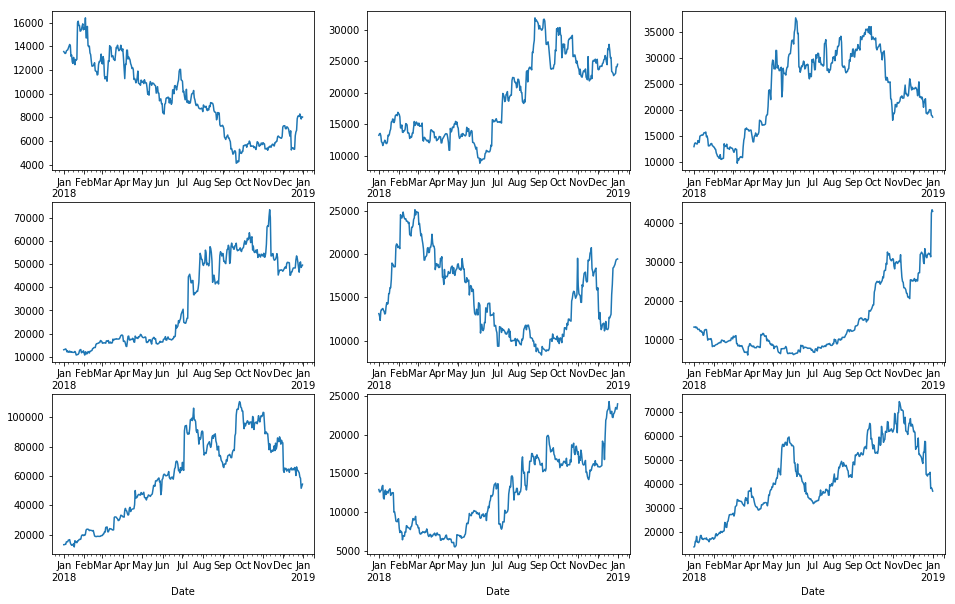

In [33]:
# simulate 9 random 2018's at a time
fig, axes = plt.subplots(nrows=3, ncols=3)
for i in range(3):
    for j in range(3):
        random_2018 = np.random.choice(data['Returns'],len(dates),replace = True)
        random_2018_df = pd.DataFrame(random_2018, index = dates, columns = ['Returns'])
        random_2018_df.index.name = 'Date'
        random_2018_df['Value'] = start_price * (random_2018_df['Returns'] + 1).cumprod()
        random_2018_df['Value'].plot(figsize=(16,10), ax=axes[i,j])

In [9]:
random_2018_df.head()

,Returns,Value
Date,,
2018-01-01,0.048685,13858.970140
2018-01-02,0.010158,13999.744159
2018-01-03,0.020221,14282.839048
2018-01-04,0.088840,15551.722018
2018-01-05,-0.005830,15461.056108
